# Countries in the World by Population 2022
#### EDA of Current estimated population of world countries

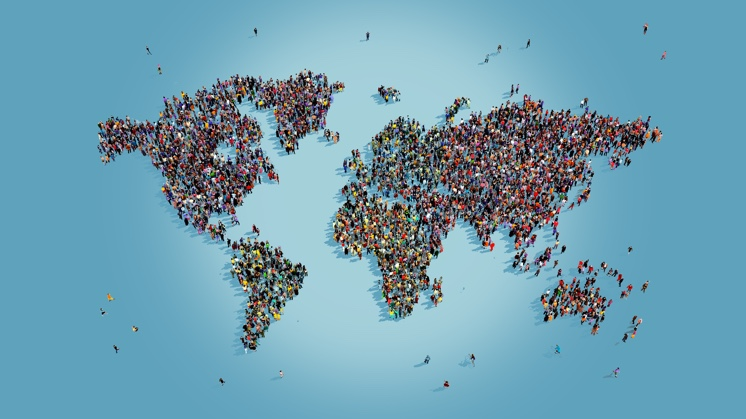

### __Revisión general del Data set__

- Importamos las librerías correspondientes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly


In [ ]:
df = pd.read_csv('world_population.csv')

In [ ]:
df.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    int64  
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    int64  
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    float64
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
 10  World Share        201 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 17.4+ KB


- Tenemos 11 columnas y algunos valores nulos, 10 variables son numéricas y solo 1 categorica

In [ ]:
df.isnull().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          7
World Share          0
dtype: int64

- Hay 7 valores nulos en Urban Pop %

In [ ]:
df = df.dropna()

- Acabamos de eliminar los valores nulos de Urban Pop % 

In [ ]:
df.isnull().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          0
World Share          0
dtype: int64

- Ahora ya no tenemos valores nulos en nuestro Data set

In [ ]:
df.shape

(194, 11)

- Podemos ver que tiene 194 filas y 11 columnas

In [ ]:
df.nunique()

Country/Other        194
Population (2020)    194
Yearly Change        154
Net Change           194
Density (P/Km²)      135
Land Area (Km²)      194
Migrants (net)       153
Fert. Rate            50
Med. Age              34
Urban Pop %           75
World Share           74
dtype: int64

- Exploremos la estadística básica para nuestras variables numéricas

In [ ]:
df.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,1.940000e+02,194.000000,1.940000e+02,194.000000,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.991822e+07,1.234433,4.190849e+05,179.015464,6.636646e+05,3354.252577,2.729897,30.278351,59.634021,0.512062
std,1.479012e+08,1.069067,1.229871e+06,283.940472,1.838294e+06,116033.087004,1.267421,9.049366,22.226695,1.897467
min,9.792900e+04,-1.350000,-3.838400e+05,2.000000,1.800000e+02,-532687.000000,1.100000,15.000000,13.000000,0.000000
25%,1.906649e+06,0.432500,4.274250e+03,32.500000,2.533500e+04,-10035.250000,1.800000,22.000000,43.000000,0.022500
50%,8.842198e+06,1.095000,6.254600e+04,83.500000,1.165500e+05,-980.000000,2.300000,30.000000,60.000000,0.110000
75%,2.877536e+07,2.060000,3.636722e+05,217.750000,5.078675e+05,8506.000000,3.600000,38.000000,78.750000,0.367500
max,1.439324e+09,3.840000,1.358663e+07,2239.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


- Population, Yearly Change, Net Change, Density, Land Area, Migrants, World Share en todas estas columnas tenemos valores atípicos ya que la media y la mediana tienen una distancia muy considerable
- Estas variables tienen una grande diferencia entre 75% y valor máximo, y 25% y valor mínimo

## Analizando las variables del Data set

In [ ]:
df.columns

Index(['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

País con mas población

In [ ]:
df_pop = df.sort_values('Population (2020)', ascending=False).head()
df_pop

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83


- El país con más población es China

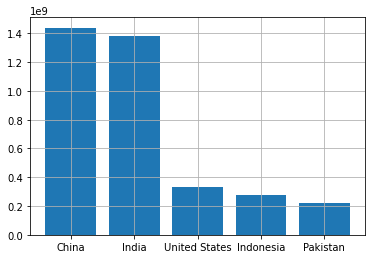

In [ ]:
plt.bar(df_pop['Country/Other'], df_pop['Population (2020)'])
plt.grid(9)
plt.show()

- China e india tienen una población parecida siendo los dos países que más población tienen superan por 4 veces a Estados Unidos que se encutra en tercera posición
- Definitivamente tenemos a China e India como **Outliers**

País con más varianza

In [ ]:
df_ch = df.sort_values('Yearly Change', ascending=False).head()
df_ch

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
54,Equatorial Guinea,1402985,3.47,46999,50,28050,16000,4.6,22,73.0,0.02
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42


- El país con más cambio anual es Niger

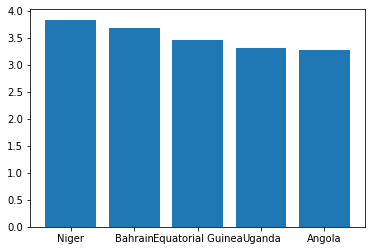

In [ ]:
plt.bar(df_ch['Country/Other'], df_ch['Yearly Change'])
plt.show()

- En este caso no hay **Outliers** están muy parejos los valores

Cambio neto

In [ ]:
df_net = df.sort_values('Net Change', ascending=False).head()
df_net

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51


- El país con mayor cambioneto es la India 

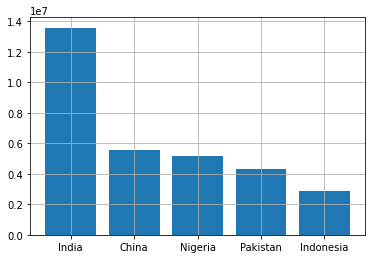

In [ ]:
plt.bar(df_net['Country/Other'], df_net['Net Change'])
plt.grid()
plt.show()

- Tenemos un **Outlier** La india supera por poco más de 2 veces a China la cuál ocupa el segundo lugar

- el cambio neto en la India sin duda es el más y una probable cauasa de porque se encuentra con los países con más población

País con más Densidad

In [ ]:
df_den = df.sort_values('Density (P/Km²)', ascending=False).head()
df_den

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
109,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01
111,Malta,441543,0.27,1171,1380,320,900,1.5,43,93.0,0.01
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
34,Channel Islands,173863,0.93,1604,915,190,1351,1.5,43,30.0,0.00


- El país con más densidad es Bahrain

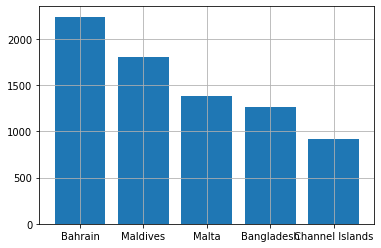

In [ ]:
plt.bar(df_den['Country/Other'], df_den['Density (P/Km²)'])
plt.grid()
plt.show()

- Parece que no hay outliers que tiene una distrubución bastante normal

Superficies de los paises

In [ ]:
 df_la = df.sort_values('Land Area (Km²)', ascending=False).head()
 df_la

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73


- El país con más área es Rusia

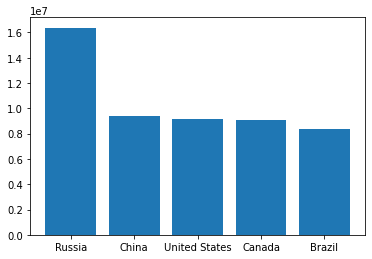

In [ ]:
plt.bar(df_la['Country/Other'], df_la['Land Area (Km²)'])
plt.show()

- Tenemos un **Outlier** Rusia tiene casi el doble de territorio que China que está en segundo lugar

- De allí los demás países parecen tener áreas muy parecidas

Migrantes 

In [ ]:
df_mi = df.sort_values('Migrants (net)', ascending=False).head()
df_mi

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,1.07
184,Turkey,84339067,1.09,909452,110,769630,283922,2.1,32,76.0,1.08
190,United Kingdom,67886011,0.53,355839,281,241930,260650,1.8,40,83.0,0.87
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48


- El país con más migrantes es Estados Unidos

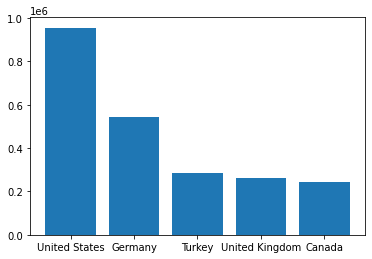

In [ ]:
plt.bar(df_mi['Country/Other'], df_mi['Migrants (net)'])
plt.show()

- Tenemos un **outlier** Estados Unidos supera por casi dos veces a Alemania que esta en segundo lugar
- Los otros países tienen un niavel de migración parecido

Tasa de fertilización

In [ ]:
df_fer = df.sort_values('Fert. Rate', ascending=0).head()
df_fer

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
162,Somalia,15893222,2.92,450317,25,627340,-40000,6.1,17,47.0,0.20
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21


- El país con mayor tasa de fertilización es Niger

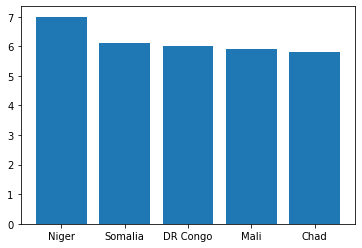

In [ ]:
plt.bar(df_fer['Country/Other'], df_fer['Fert. Rate'])
plt.show()

- Parece que todo esta bien, no tenemos outliers

Edad Media

In [ ]:
df_age = df.sort_values('Med. Age', ascending=0).head()
df_age

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
90,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62
88,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0,0.78
112,Martinique,375265,-0.08,-289,354,1060,-960,1.9,47,92.0,0.00
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,1.07
143,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66.0,0.13


In [ ]:
df_age = df.sort_values('Med. Age', ascending=1).head()
df_age

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42


- El país con Edad Media más joven es Niger mientras el de mayor edad media es Japón

Porcentaje de población urbana

In [ ]:
df_ur = df.sort_values('Urban Pop %', ascending=0).head()
df_ur

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
149,Réunion,895312,0.72,6385,358,2500,-1256,2.3,36,100.0,0.01
16,Belgium,11589623,0.44,50295,383,30280,48000,1.7,42,98.0,0.15
145,Qatar,2881053,1.73,48986,248,11610,40000,1.9,32,96.0,0.04
186,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96.0,0.00
192,Uruguay,3473730,0.35,11996,20,175020,-3000,2.0,36,96.0,0.04


In [ ]:
df_ur = df.sort_values('Urban Pop %', ascending=1).head()
df_ur

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
138,Papua New Guinea,8947024,1.95,170915,20,452860,-800,3.6,22,13.0,0.11
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
107,Malawi,19129952,2.69,501205,203,94280,-16053,4.3,18,18.0,0.25
148,Rwanda,12952218,2.58,325268,525,24670,-9000,4.1,20,18.0,0.17


- El país con mayor porcentaje de población urbana es Reúnion 
- El país con menor porcentaje de población urbana es Papua New Guinea

Cuota de población

In [ ]:
df_wo = df.sort_values('World Share', ascending=0).head()
df_wo

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83


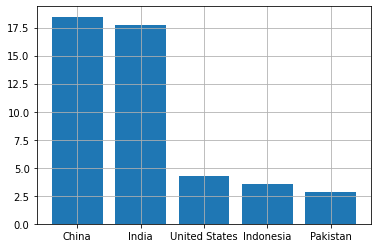

In [ ]:
plt.bar(df_wo['Country/Other'], df_wo['World Share'])
plt.grid()
plt.show()

- Tanto China como India superan más de 3 veces a Estados unidos que está en 3 lugar, así que tenemos otro **Outlier**
- Los demás países parecen tener una distribución pareja

## **Correlaciones**

In [ ]:
df.corr()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Population (2020),1.000000,-0.042123,0.850258,0.040462,0.447208,-0.291511,-0.056811,0.028657,-0.045453,0.999999
Yearly Change,-0.042123,1.000000,0.169669,-0.009617,-0.029645,-0.074179,0.840599,-0.860207,-0.352790,-0.042066
Net Change,0.850258,0.169669,1.000000,0.034562,0.291836,-0.339768,0.159371,-0.185567,-0.174918,0.850109
Density (P/Km²),0.040462,-0.009617,0.034562,1.000000,-0.151990,-0.096199,-0.165663,0.129078,0.006848,0.040534
Land Area (Km²),0.447208,-0.029645,0.291836,-0.151990,1.000000,0.247832,-0.056223,0.077940,0.128382,0.447232
Migrants (net),-0.291511,-0.074179,-0.339768,-0.096199,0.247832,1.000000,-0.135545,0.212045,0.270934,-0.291342
Fert. Rate,-0.056811,0.840599,0.159371,-0.165663,-0.056223,-0.135545,1.000000,-0.882105,-0.485951,-0.056913
Med. Age,0.028657,-0.860207,-0.185567,0.129078,0.077940,0.212045,-0.882105,1.000000,0.534106,0.028690
Urban Pop %,-0.045453,-0.352790,-0.174918,0.006848,0.128382,0.270934,-0.485951,0.534106,1.000000,-0.045258
World Share,0.999999,-0.042066,0.850109,0.040534,0.447232,-0.291342,-0.056913,0.028690,-0.045258,1.000000


Tenemos varias correlaciones interesantes y con valores bastantes altos:
- Cuota de Población y población 0.99
- Cambio Neto y población 0.85
- Cambio Neto y cuota de población 0.85
